In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import dragoman as dm
from scipy import stats
import scipy

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# De-correlation

In [3]:
A = np.random.rand(2, 2)

In [4]:
cov = A * A.T

In [5]:
cov = np.array([[0.07647196, 0.23147416],[0.23147416, 0.98215036]])

In [6]:
cov

array([[0.07647196, 0.23147416],
       [0.23147416, 0.98215036]])

In [7]:
X = stats.multivariate_normal([1,1], cov=cov).rvs(10000).T

In [8]:
X.shape

(2, 10000)

In [9]:
def plot(X, *args, **kwargs):
    plt.plot(X[0], X[1], '.', ms=1, *args, **kwargs)
    plt.gca().axvline(0, c='grey')
    plt.gca().axhline(0, c='grey')
    plt.gca().set_xlim(-3,3)
    plt.gca().set_ylim(-3,3)

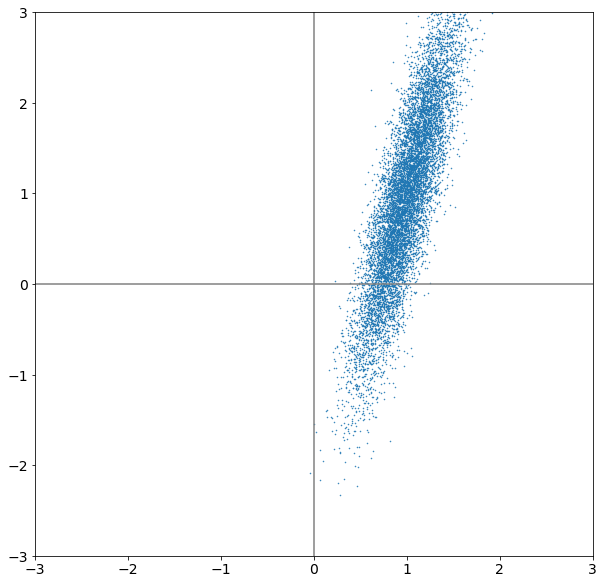

In [10]:
plot(X)
#plt.savefig('X.png', bbox_inches='tight')

In [11]:
X = X - np.mean(X, axis=1)[:, np.newaxis]

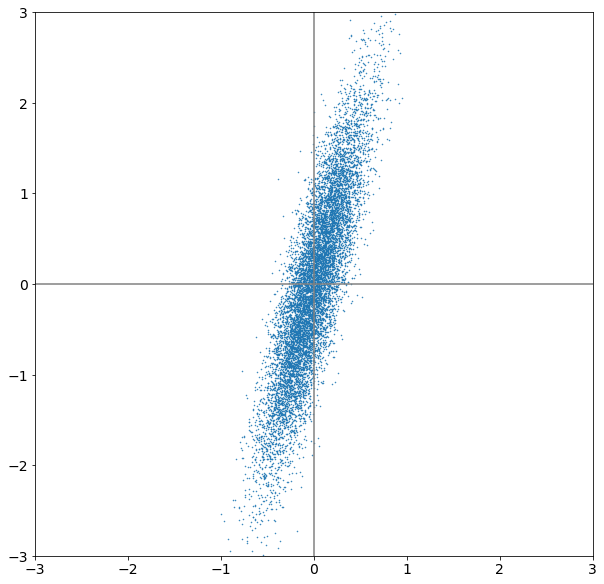

In [12]:
plot(X)
#plt.savefig('X_0.png', bbox_inches='tight')

In [13]:
covX = (X @ X.T) / (X.shape[1] - 1) 

In [14]:
(X @ X.T) / (X.shape[1] - 1)

array([[0.07595485, 0.23081264],
       [0.23081264, 0.98288742]])

# Eigenvalue

In [15]:
L, E = scipy.linalg.eig(covX)
W = E.T
Y = W @ X

In [16]:
Y

array([[ 0.00213518, -0.01035046,  0.14327708, ...,  0.14208107,
         0.05086899,  0.178684  ],
       [-0.01352824,  0.28245745,  0.74457177, ..., -0.33864027,
        -0.07810728, -1.1961707 ]])

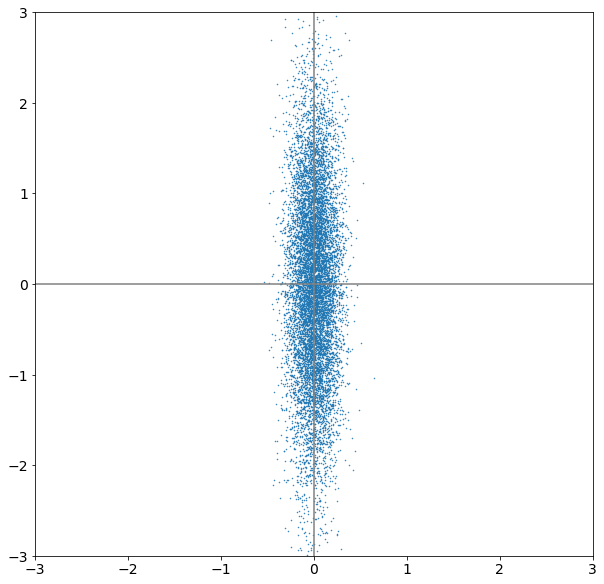

In [17]:
plot(Y)
#plt.savefig('Y_eigen.png', bbox_inches='tight')

In [18]:
s = 1/np.sqrt(L.real)

In [19]:
Y_eigen = (W @ X) * s[:, np.newaxis]

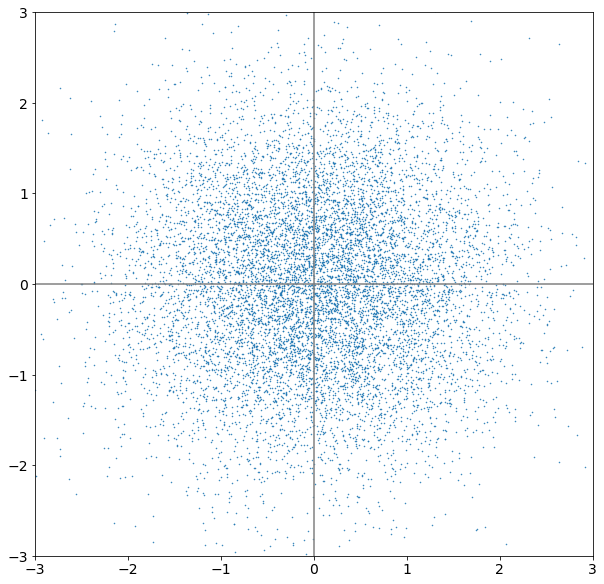

In [20]:
plot(Y_eigen)
#plt.savefig('Y_eigen_white.png', bbox_inches='tight')

In [21]:
np.cov(Y_eigen)

array([[1.00000000e+00, 6.32446279e-17],
       [6.32446279e-17, 1.00000000e+00]])

# Cholesky

In [22]:
inv_covX = np.linalg.inv(covX)
L = np.linalg.cholesky(inv_covX)
#L = np.linalg.cholesky(covX)
W = L.T
Y_cholesky = W @ X

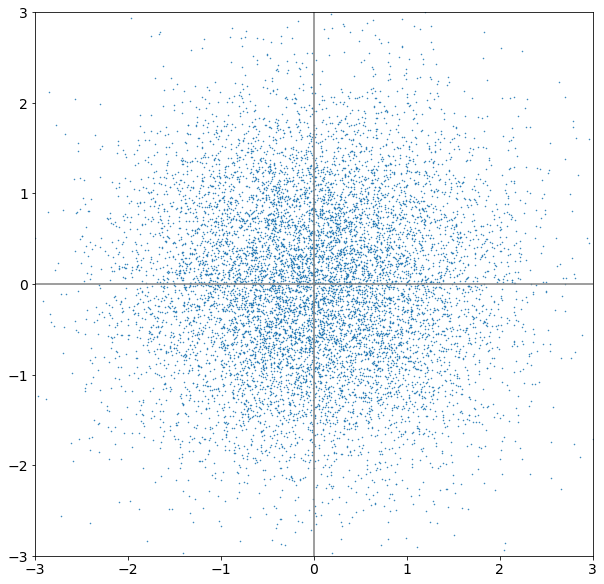

In [23]:
plot(Y_cholesky)
#plt.savefig('Y_cholesky.png', bbox_inches='tight')

In [24]:
np.cov(Y_cholesky)

array([[1.0000000e+00, 3.4251585e-16],
       [3.4251585e-16, 1.0000000e+00]])

# SVD

In [25]:
U, s, V = np.linalg.svd(X.T) #, compute_uv=False)

In [26]:
S = np.zeros((U.shape[0], V.shape[0]))
np.fill_diagonal(S, s)

In [27]:
np.square(S)

array([[10381.45517125,     0.        ],
       [    0.        ,   205.90866252],
       [    0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ],
       [    0.        ,     0.        ],
       [    0.        ,     0.        ]])

In [28]:
V.shape

(2, 2)

In [29]:
V @ (np.square(S) / (X.shape[1] - 1) @ V.T)[:2]

array([[0.07595485, 0.23081264],
       [0.23081264, 0.98288742]])

In [30]:
Xrec = (U @ S @ V).T

In [31]:
Xrec.shape

(2, 10000)

In [32]:
def vec(vec1): 
    array = np.array([[0, 0, vec1[0], vec1[1]]])
    x, y, u, v = zip(*array)
    ax = plt.gca()
    ax.quiver(x, y, u, v, color='b', angles='xy', scale_units='xy',scale=1)

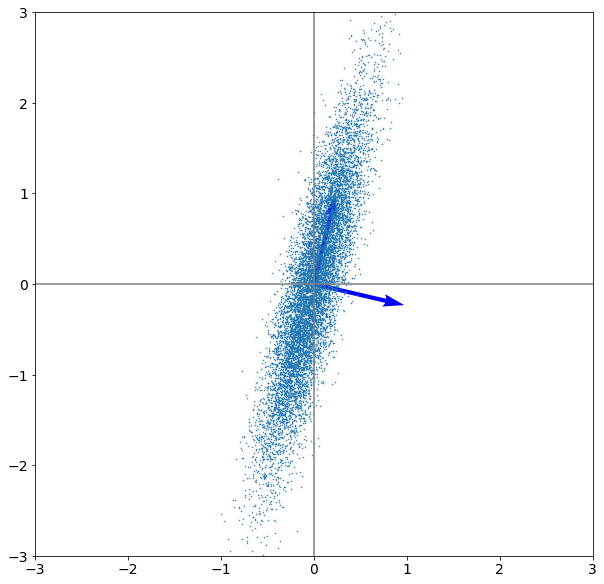

In [33]:
plot(X)
vec(V[0])
vec(V[1])
#plt.savefig('X_SVD.png', bbox_inches='tight')

In [34]:
s

array([101.8894262 ,  14.34951785])

In [35]:
S_red = np.zeros_like(S)
S_red[0,0] = S[0,0]

In [36]:
X_pca0 = (U @ S)[:, [0]] @ V[[0]]

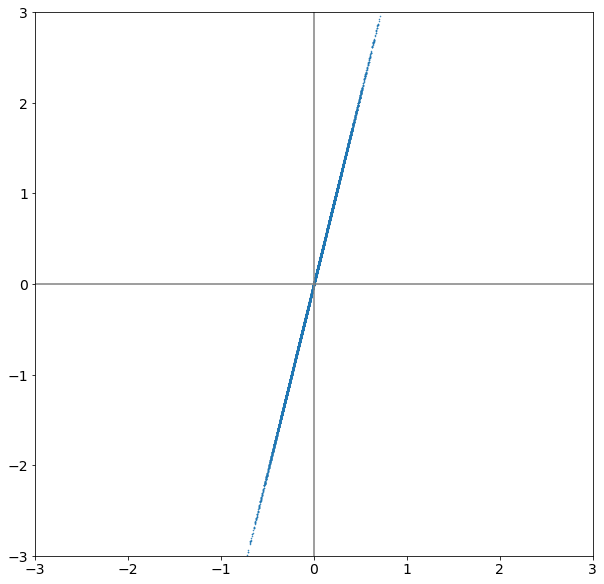

In [37]:
plot(X_pca0.T)
#plt.savefig('pca0', bbox_inches='tight')

In [38]:
np.cov(X_pca0.T)

array([[0.05648221, 0.23548328],
       [0.23548328, 0.98176714]])

In [39]:
np.var(X_pca0.T) / np.var(X)

0.9805514700588955

In [40]:
cov

array([[0.07647196, 0.23147416],
       [0.23147416, 0.98215036]])

In [41]:
V

array([[ 0.23324105,  0.97241895],
       [ 0.97241895, -0.23324105]])

In [42]:
Y_svd = ((V @ X).T @ np.diag(1/s *np.sqrt(X.shape[1] -1))).T

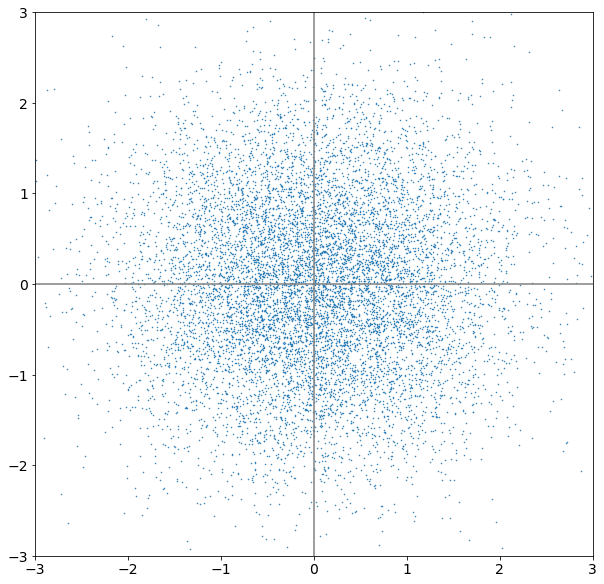

In [43]:
plot(Y_svd)
#plt.savefig('Y_SVD.png', bbox_inches='tight')

In [44]:
Y

array([[ 0.00213518, -0.01035046,  0.14327708, ...,  0.14208107,
         0.05086899,  0.178684  ],
       [-0.01352824,  0.28245745,  0.74457177, ..., -0.33864027,
        -0.07810728, -1.1961707 ]])

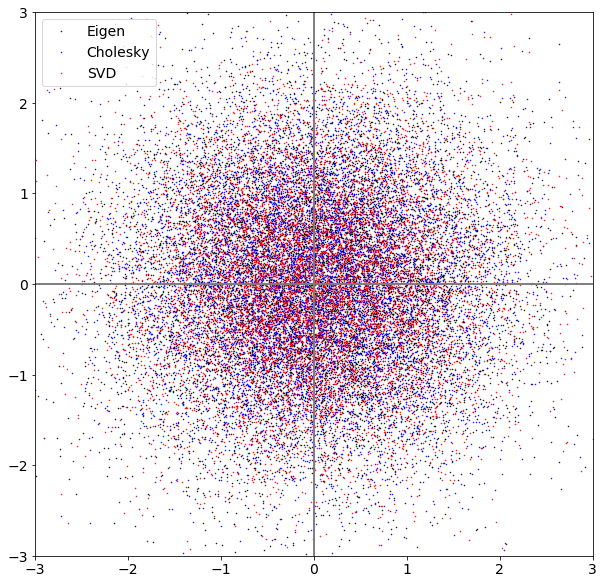

In [45]:
plot(Y_eigen, c='k', label='Eigen')
plot(Y_cholesky, c='b', label='Cholesky')
plot(Y_svd, c='r', label='SVD')
plt.legend()
#plt.savefig('Y_comp.png', bbox_inches='tight')

# MNIST PCA

In [46]:
# Those are the wrong ones!
#from sklearn.datasets import load_digits

In [47]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_openml

In [48]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [49]:
y = np.int32(y)

In [50]:
X.shape

(70000, 784)

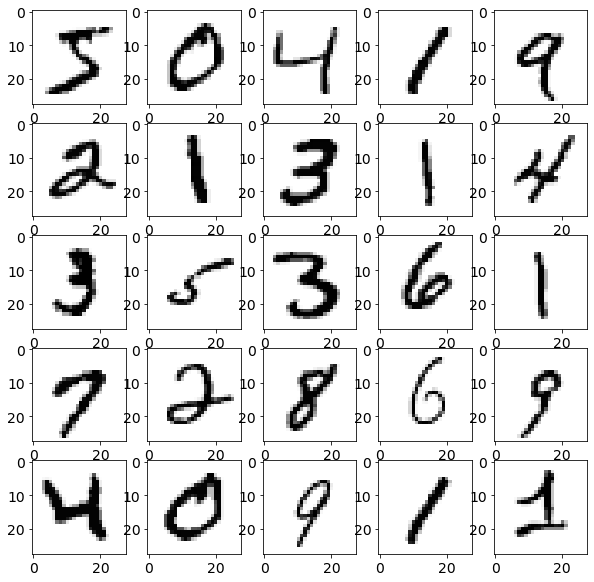

In [51]:
fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X[i].reshape(28,28), cmap='Greys')
#plt.savefig('mnist.png', bbox_inches='tight')

In [66]:
p = PCA(n_components=20)
p.fit_transform(X)

array([[ 122.25525545, -316.23383829,  -51.13177353, ...,  294.645814  ,
         277.30648634,  147.45602611],
       [1010.4940033 , -289.96360949,  576.12083702, ...,   38.23837015,
          64.98880047, -113.4217758 ],
       [ -58.99594569,  393.69744053, -161.99823924, ..., -119.22462993,
         -19.919668  , -435.47141824],
       ...,
       [-271.50701336,  590.0784895 ,  341.36881056, ...,   38.6247342 ,
          83.83064618,  -77.98657696],
       [-310.2248236 , -116.72715286,  635.72000447, ...,   93.11230471,
        -286.25338099, -207.03073211],
       [1058.86212389,  -83.39253814,  731.34225169, ..., -313.05424385,
          -4.70595908,  161.31601149]])

Text(0.5, 0, 'PCA component')

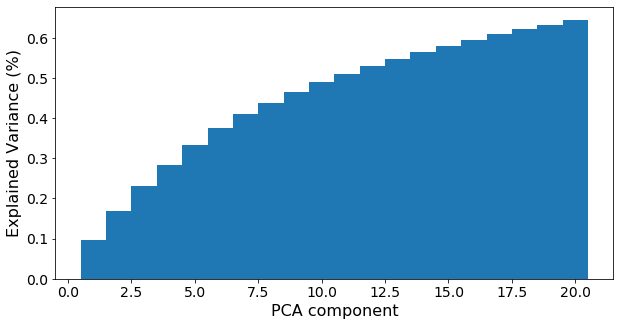

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.bar(np.arange(p.n_components)+1, np.cumsum(p.explained_variance_ratio_), width=1, label='cumulative')
#plt.bar(np.arange(p.n_components)+1, p.explained_variance_ratio_, width=1, label='per component')

ax.set_ylabel('Explained Variance (%)')
ax.set_xlabel('PCA component')

#plt.gca().set_yscale('log')
#plt.savefig('explained variance.png', bbox_inches='tight')

In [68]:
np.cumsum(p.explained_variance_ratio_)

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.56462369, 0.58045749,
       0.59532065, 0.60851383, 0.62130336, 0.63317505, 0.64470242])

In [69]:
reduced_data = p.transform(X)

In [70]:
digits_rec = p.inverse_transform(reduced_data) #+ mean

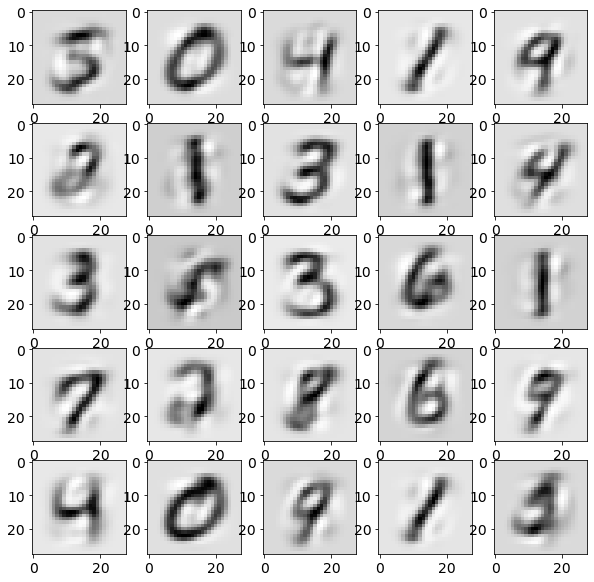

In [71]:
fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(digits_rec[i].reshape(28,28), cmap='Greys')
#plt.savefig('mnist_pca20.png', bbox_inches='tight')

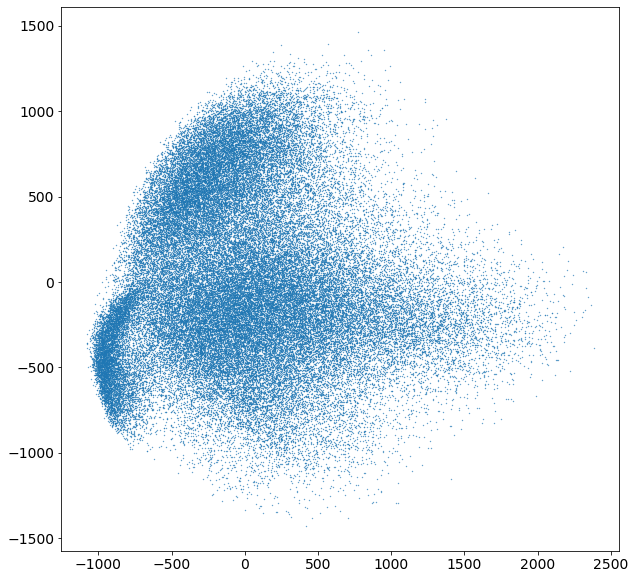

In [72]:
plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=0.1, cmap=plt.cm.get_cmap('Spectral', 10))
#plt.savefig('mnist_pca2_dist.png', bbox_inches='tight')

# Clustering

In [73]:
# by hand

mask = (reduced_data[:, 0] < -700 ) & (reduced_data[:, 1] < 0)

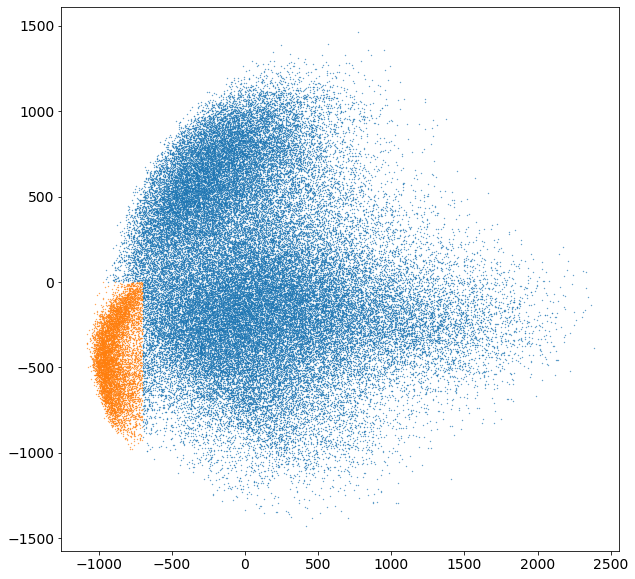

In [74]:
plt_data = plt.scatter(reduced_data[~mask][:, 0], reduced_data[~mask][:, 1], s=0.1)
plt_data = plt.scatter(reduced_data[mask][:, 0], reduced_data[mask][:, 1], s=0.1)
#plt.savefig('mnist_pca2_dist.png', bbox_inches='tight')

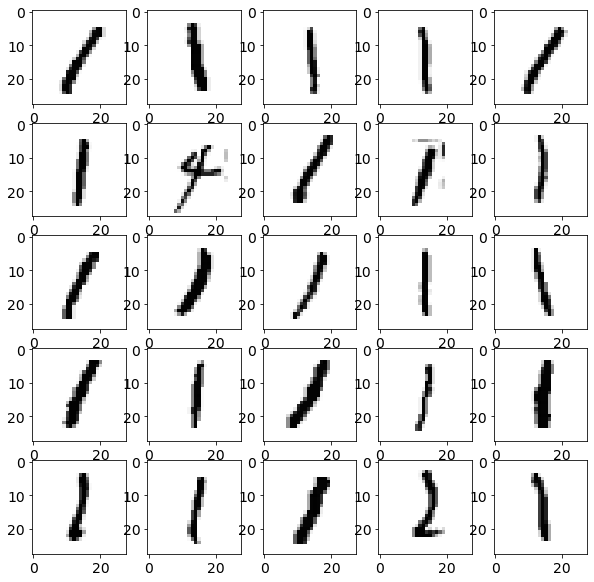

In [75]:
fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X[mask][i].reshape(28,28), cmap='Greys')
#plt.savefig('mnist_pca2_cluster.png', bbox_inches='tight')

In [76]:
kmeans = KMeans(init='k-means++', n_clusters=10, max_iter=1000)
kmeans.fit(reduced_data)

centroids = kmeans.cluster_centers_

Text(0, 0.5, 'component 2')

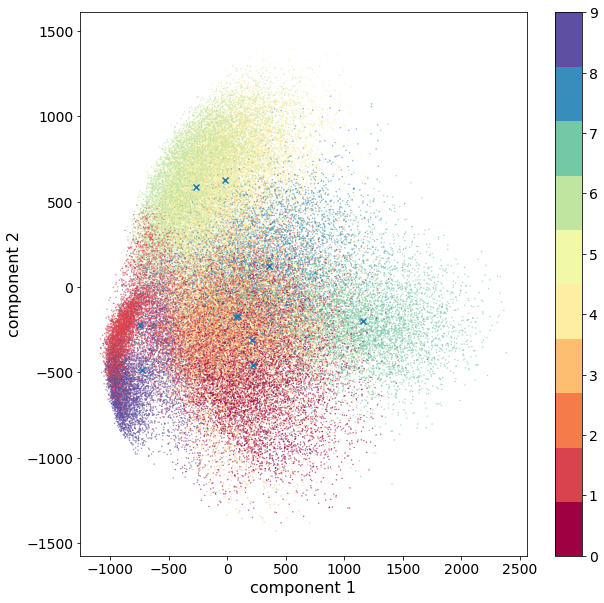

In [77]:
plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, s=0.1, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x')
plt.xlabel('component 1')
plt.ylabel('component 2')
#plt.savefig('mnist_pca2_kmeans_cluster.png', bbox_inches='tight')

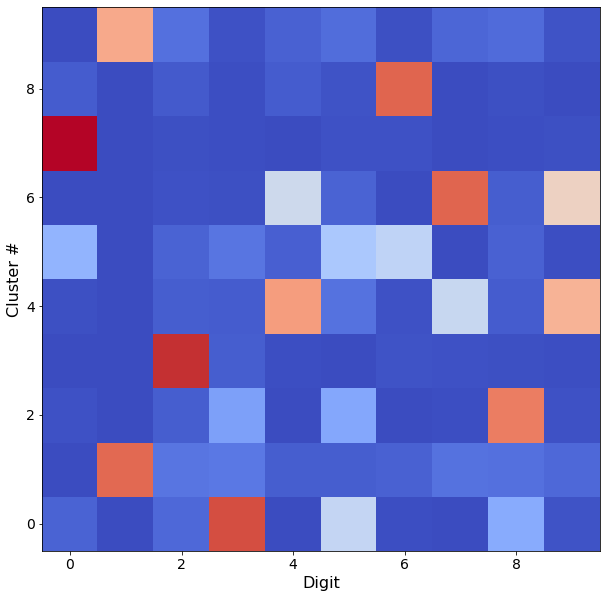

In [78]:
h = plt.hist2d(y, kmeans.labels_, bins=[np.linspace(-0.5,9.5, 11),
                                        np.linspace(-0.5,np.max(kmeans.labels_)+0.5, int(np.max(kmeans.labels_)+2))
                                       ],
                   cmap='coolwarm');
plt.gca().set_xlabel('Digit')
plt.gca().set_ylabel('Cluster #')
plt.savefig('mnist_confusion.png', bbox_inches='tight')

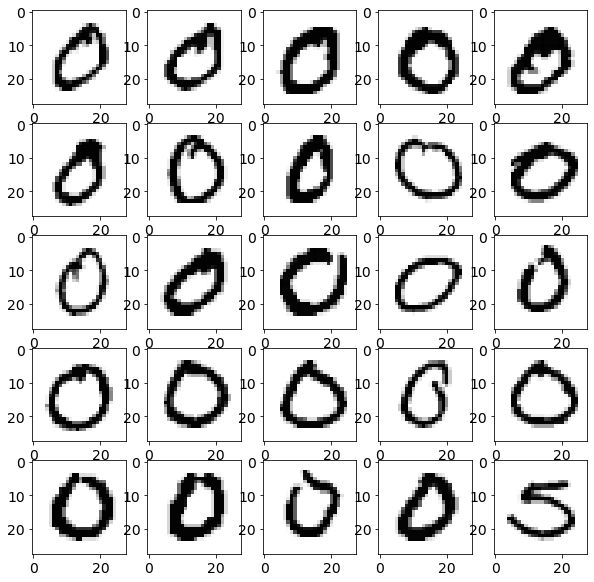

In [80]:
mask = kmeans.labels_ == 7
fig, ax = plt.subplots(5,5)
for i in range(25):
    axis = ax[i//5, i%5]
    axis.imshow(X[mask][i].reshape(28,28), cmap='Greys')
plt.savefig('mnist_cluster.png', bbox_inches='tight')